## Bike Sharing Assignment

### Problem Statement:

The consulting company is tasked with analyzing a dataset from BoomBikes, a US bike-sharing provider facing financial challenges due to the Covid-19 pandemic. The goal is to identify significant variables that predict the demand for shared bikes post-lockdown. The company aims to understand the factors influencing bike demand in the American market, evaluating their impact and effectiveness. The analysis will enable BoomBikes to formulate a strategic business plan, positioning itself for success and profitability once the economy recovers.

### Data Understanding

In [129]:
import pandas as pd

In [130]:
days = pd.read_csv('day.csv')

In [131]:
days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [132]:
days.shape

(730, 16)

In [133]:
days.info() 
# All non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [134]:
days.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Visualization

In [135]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
# Identify numerical variables
numerical_variables = days.select_dtypes(include=['number']).columns.tolist()
print("Numerical Variables:", numerical_variables)

# Identify categorical variables
categorical_variables = days.select_dtypes(include=['object']).columns.tolist()
print("Categorical Variables:", categorical_variables)

Numerical Variables: ['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
Categorical Variables: ['dteday']


In [138]:
days['dteday'].nunique()
# Number of unique values is equal to number of records, so this is not categorical

730

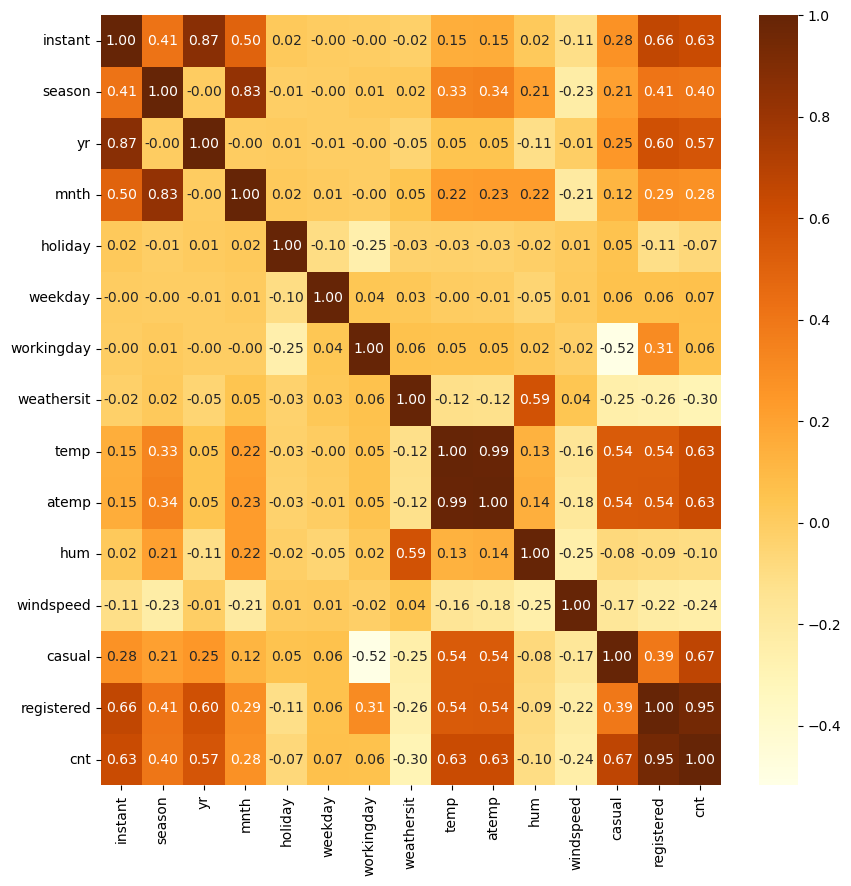

In [139]:
plt.figure(figsize=(10,10))
sns.heatmap(days[numerical_variables].corr(),annot=True,fmt='.2f',cmap="YlOrBr")
plt.show()

In [140]:
# Dropping casual and registered columns as they are not relavent for analysis and are included in count (cnt)
# Dropping instant as it is just index
drop_var = ['casual','registered','instant','dteday']

days.drop(drop_var, axis = 1,inplace = True)


In [141]:
numerical_variables = [x for x in numerical_variables if x not in drop_var]

In [142]:
numerical_variables

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt']

In [143]:
days.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


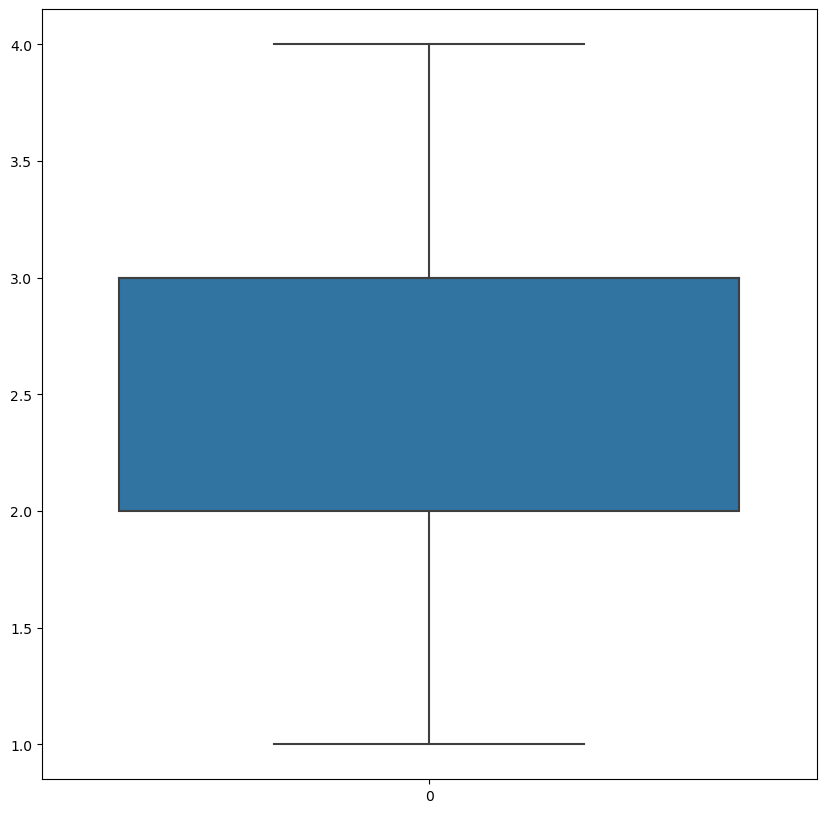

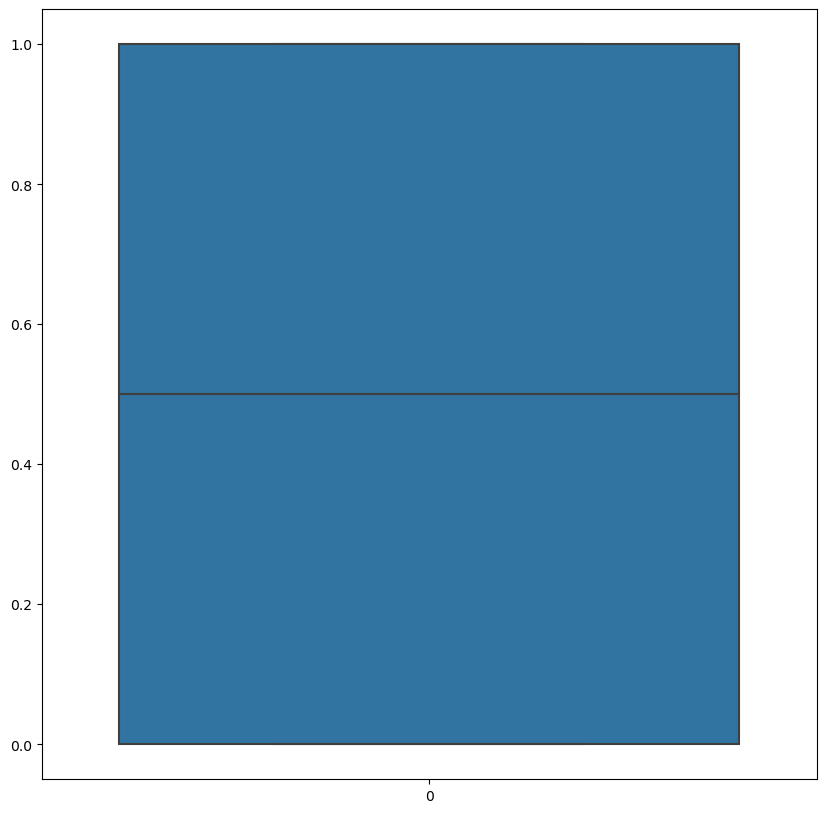

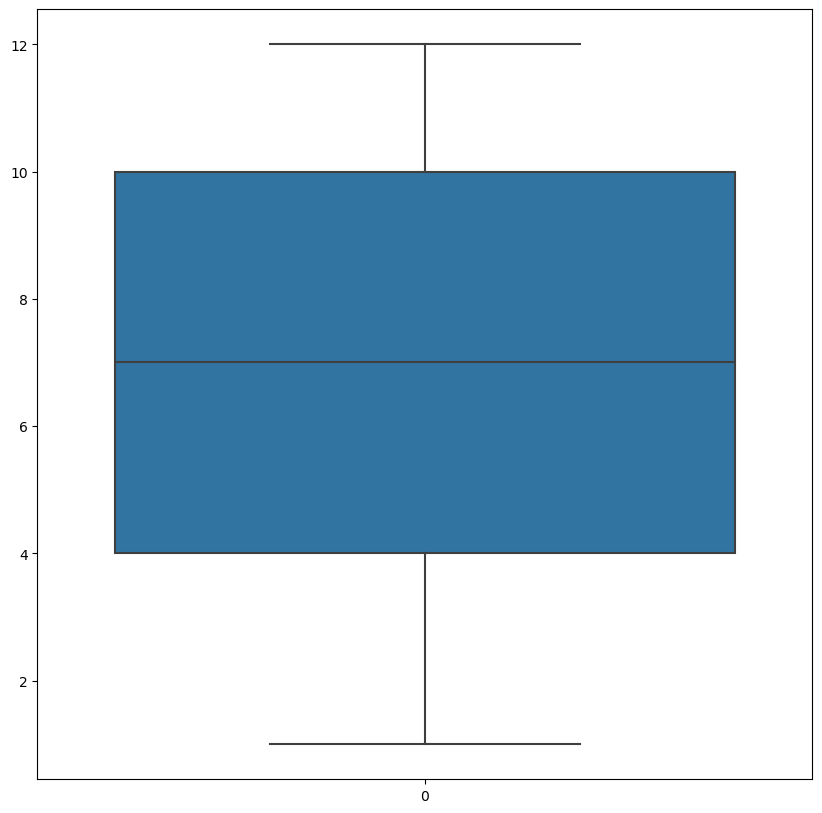

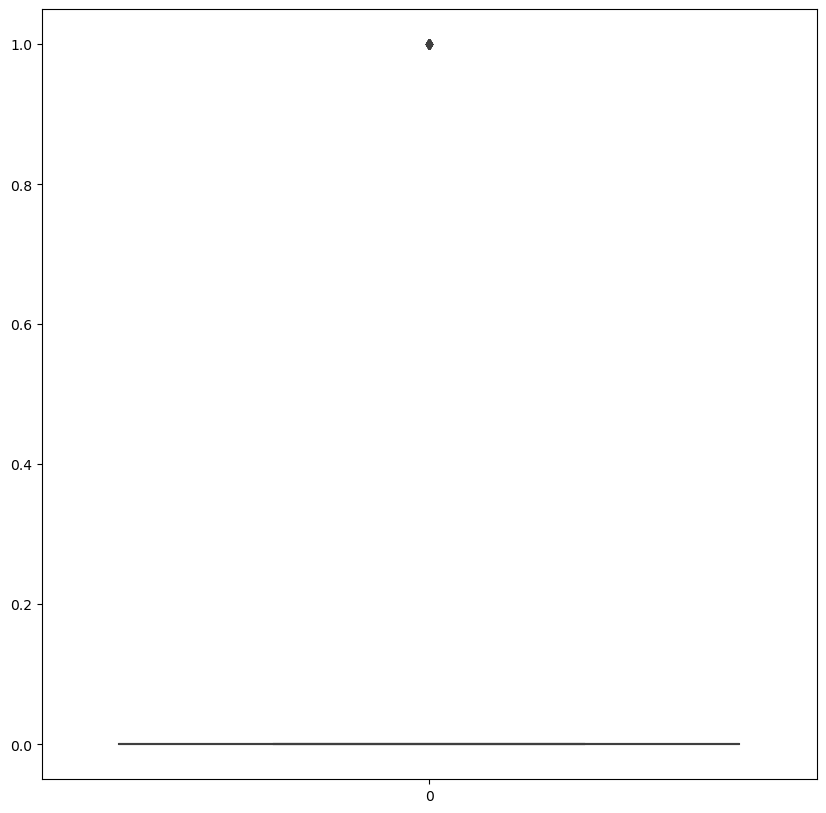

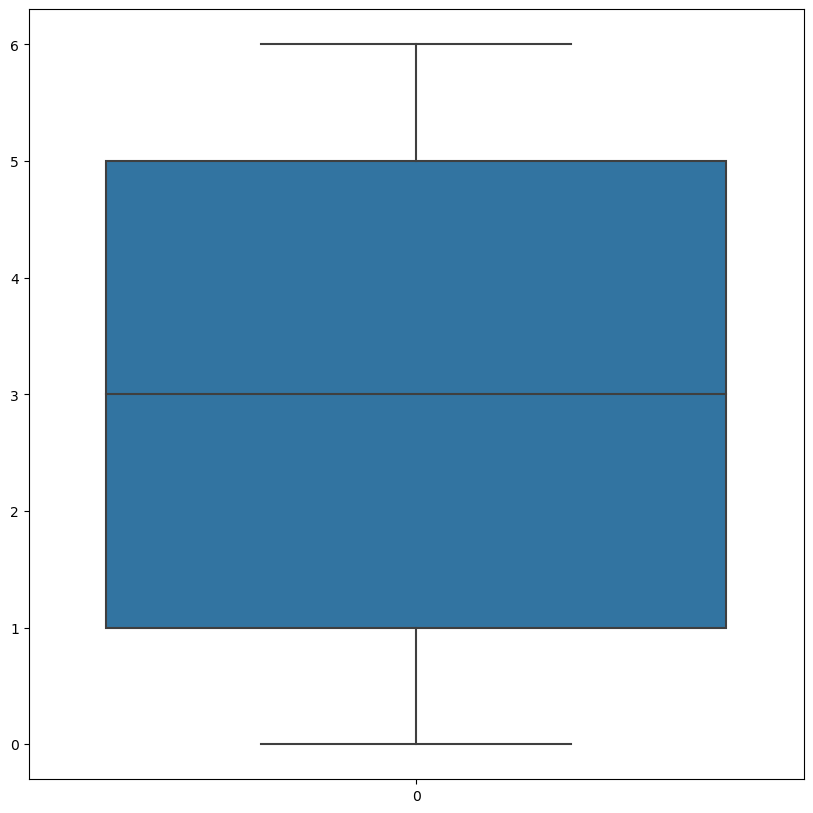

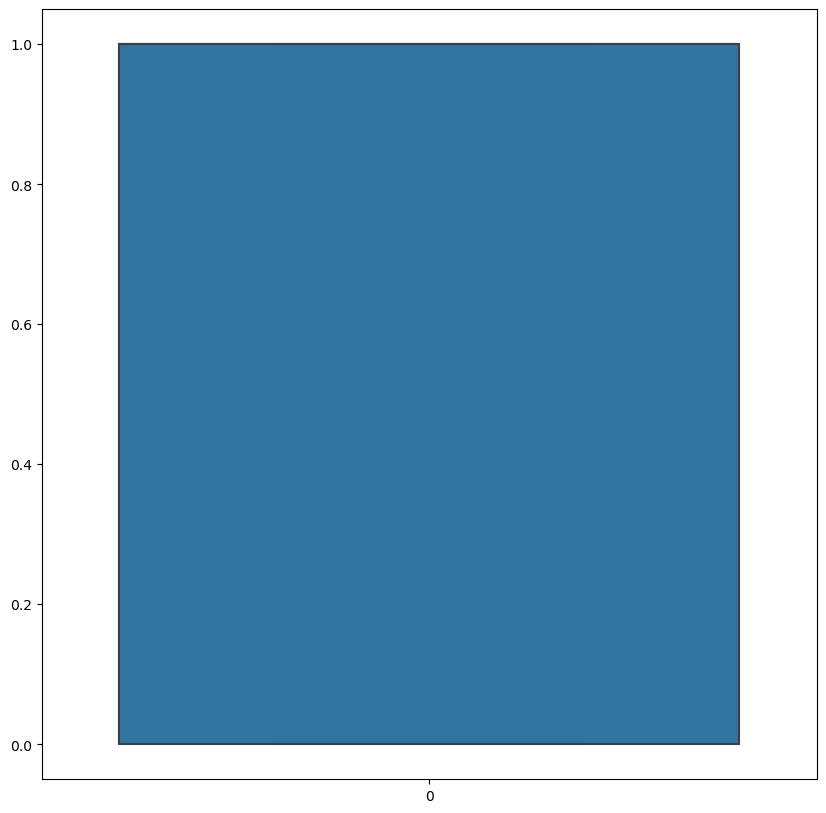

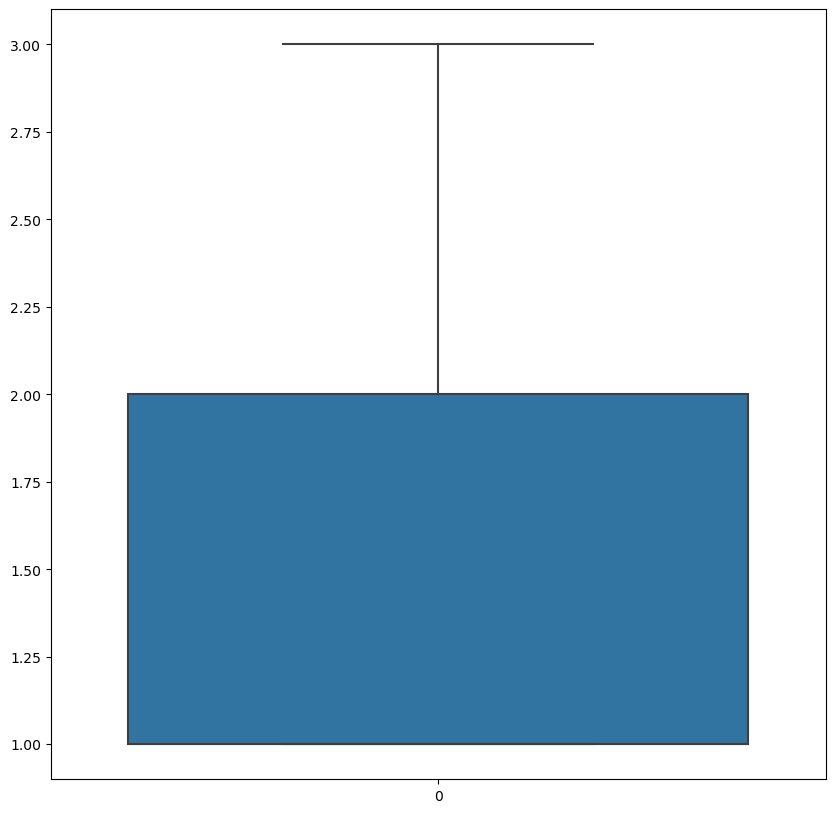

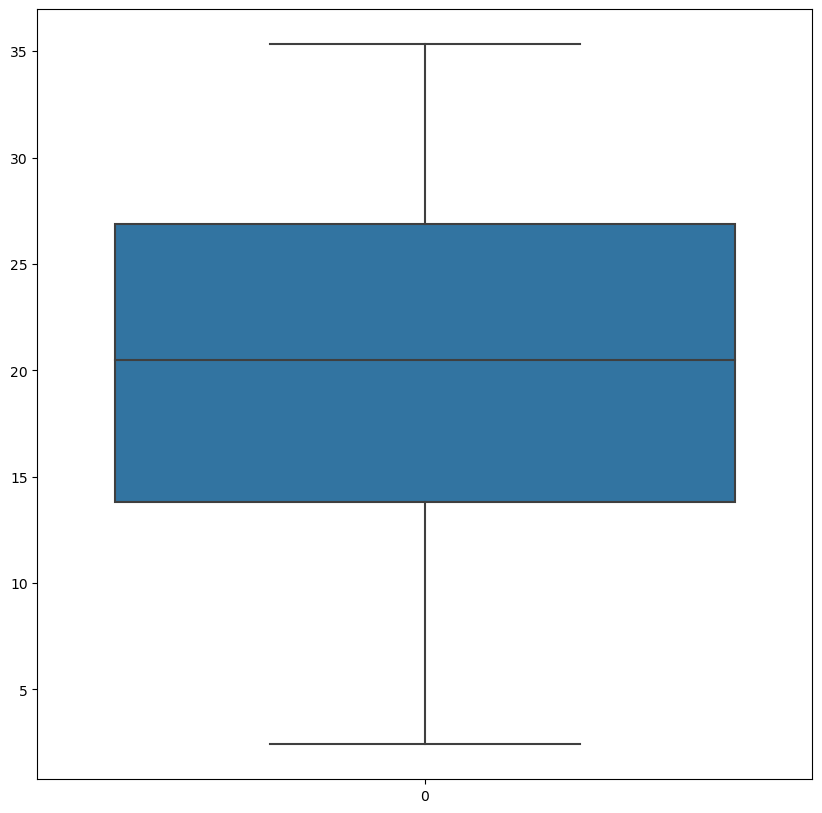

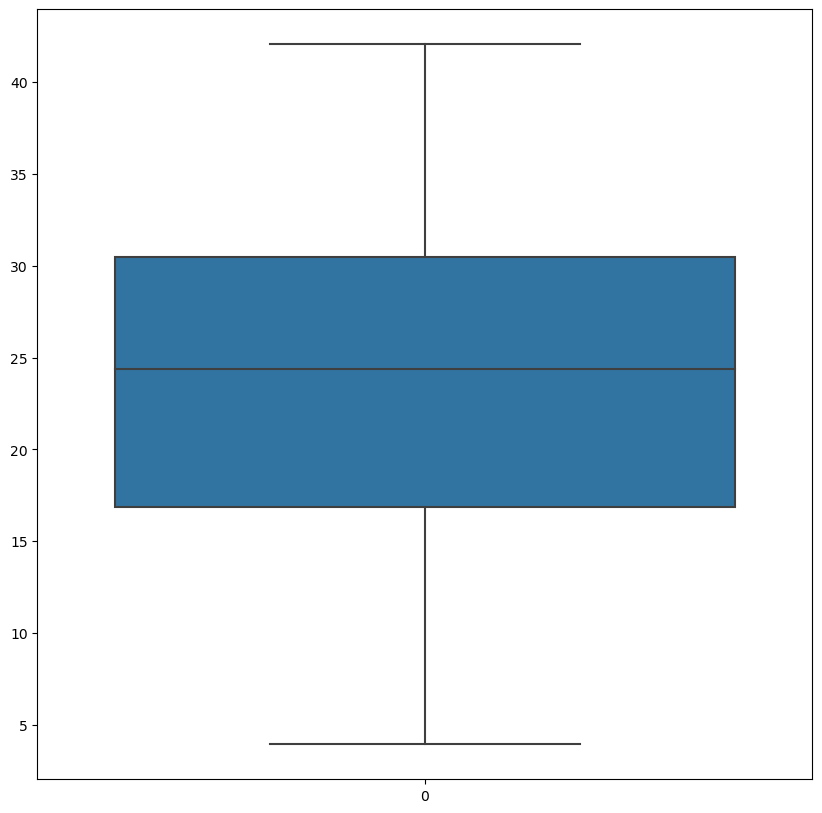

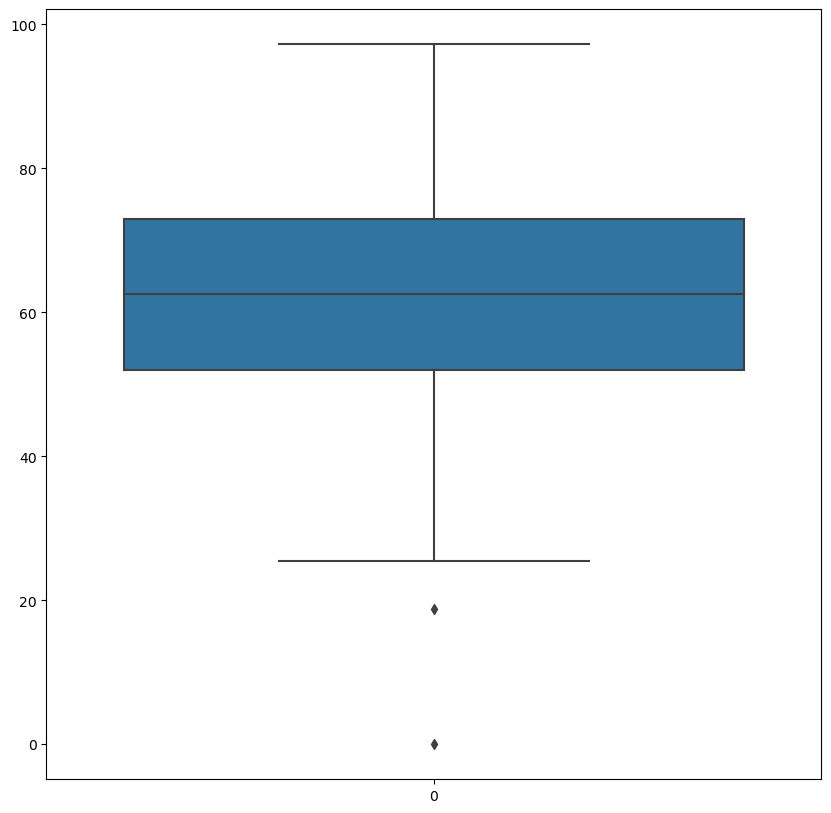

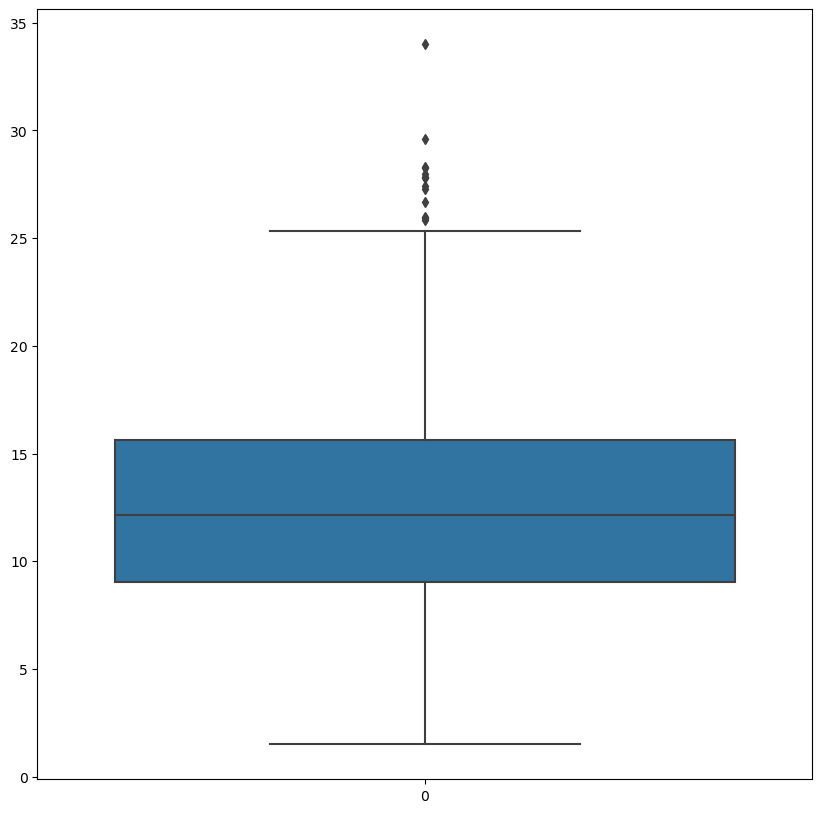

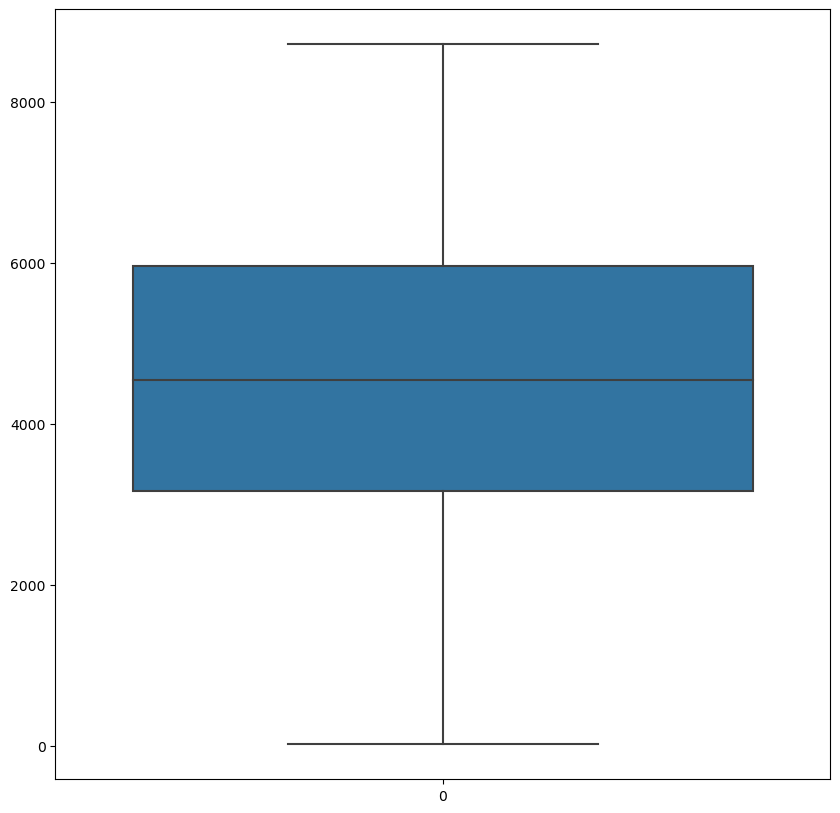

In [144]:
for i in numerical_variables:
    plt.figure(figsize=(10,10))
    sns.boxplot(data = days[i], orient = 'v')
    plt.show()

In [145]:
# plt.figure(figsize=(3, 80))
# sns.pairplot(days,height=2.5, aspect=1.5)
# plt.show()

### Creating dummy variables

In [146]:
# From the date dictionary we know that season, yr, mnth and weathersit are categorical variables
encoding = ['season','yr','mnth','weekday','weathersit']

In [147]:
numerical_variables = [item for item in numerical_variables if item not in encoding]
numerical_variables

['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [148]:
df_new = pd.get_dummies(days, columns=encoding, drop_first=True, dtype=int)

In [149]:
df_new.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [150]:
df_new.shape

(730, 30)

### Splitting the Data into Training and Testing Sets

In [151]:
import numpy as np
from sklearn.model_selection import train_test_split

In [152]:
np.random.seed(0) # So that the train and test data set always have the same rows for testing with different feature

df_train, df_test = train_test_split(df_new, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scaling the features

In [153]:
from sklearn.preprocessing import MinMaxScaler

In [154]:
scaler = MinMaxScaler()

In [155]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_train[numerical_variables] = scaler.fit_transform(df_train[numerical_variables])

In [156]:
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,0.0,1.0,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,1,0,0,0,0,0,0
576,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,0.0,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,0.0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,0.0,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [157]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [158]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building a linear model

### RFE

In [159]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [160]:
lm = LinearRegression()

In [161]:
lm.fit(X_train, y_train)

LinearRegression()

In [162]:
rfe = RFE(lm, n_features_to_select =15) 

In [163]:
rfe = rfe.fit(X_train, y_train)

In [164]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 7),
 ('season_4', True, 1),
 ('yr_1', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 8),
 ('mnth_4', False, 10),
 ('mnth_5', False, 9),
 ('mnth_6', False, 11),
 ('mnth_7', False, 13),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 14),
 ('mnth_12', False, 15),
 ('weekday_1', False, 2),
 ('weekday_2', False, 3),
 ('weekday_3', False, 5),
 ('weekday_4', False, 6),
 ('weekday_5', False, 4),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [165]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_4', 'yr_1', 'mnth_8', 'mnth_9', 'mnth_10',
       'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [166]:
X_train.columns[~rfe.support_]

Index(['season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [167]:
X_train_rfe = X_train[col]

In [168]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [169]:
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          4.61e-191
Time:                        23:17:16   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     494   BIC:                            -938.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1944      0.029      6.748   

In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [171]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [172]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,367.57
2,temp,364.77
4,hum,16.99
1,workingday,5.05
5,windspeed,3.96
7,season_4,2.29
13,weathersit_2,2.14
8,yr_1,2.03
12,weekday_6,1.90
6,season_2,1.84


In [173]:
# Dropping temp after checking p and VIF
X_train_rfe.drop('atemp',axis = 1,inplace = True)

In [174]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.59
2,temp,10.01
1,workingday,5.05
4,windspeed,3.82
6,season_4,2.27
12,weathersit_2,2.14
7,yr_1,2.03
11,weekday_6,1.90
5,season_2,1.83
10,mnth_10,1.62


In [175]:
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              1297.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):                        0.00
Time:                        23:17:16   Log-Likelihood:                          496.58
No. Observations:                 510   AIC:                                     -965.2
Df Residuals:                     496   BIC:                                     -905.9
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [176]:
X_train_rfe.drop('hum',axis = 1,inplace = True)

In [177]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.38
1,workingday,4.39
3,windspeed,3.60
5,season_4,2.02
6,yr_1,2.02
4,season_2,1.82
10,weekday_6,1.77
9,mnth_10,1.62
7,mnth_8,1.59
11,weathersit_2,1.54


In [178]:
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              1398.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):                        0.00
Time:                        23:17:16   Log-Likelihood:                          496.22
No. Observations:                 510   AIC:                                     -966.4
Df Residuals:                     497   BIC:                                     -911.4
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [179]:
X_train_rfe.drop('temp',axis = 1,inplace = True)

In [180]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,3.53
2,windspeed,3.41
4,season_4,2.01
5,yr_1,1.91
9,weekday_6,1.61
3,season_2,1.60
8,mnth_10,1.57
10,weathersit_2,1.54
6,mnth_8,1.24
7,mnth_9,1.16


In [181]:
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              459.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):                   2.63e-260
Time:                        23:17:16   Log-Likelihood:                          206.68
No. Observations:                 510   AIC:                                     -389.4
Df Residuals:                     498   BIC:                                     -338.5
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

### Residual Analysis of the train data

In [182]:
y_train_cnt = lm.predict(X_train_rfe)

In [183]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

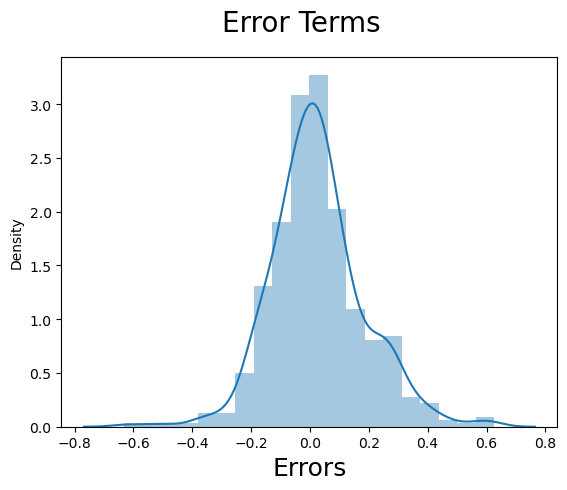

In [184]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Applying the scaling on the test sets

In [185]:
df_test[numerical_variables] = scaler.transform(df_test[numerical_variables])

In [186]:
y_test = df_test.pop('cnt')
X_test = df_test

### Making Predictions

In [187]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

In [188]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

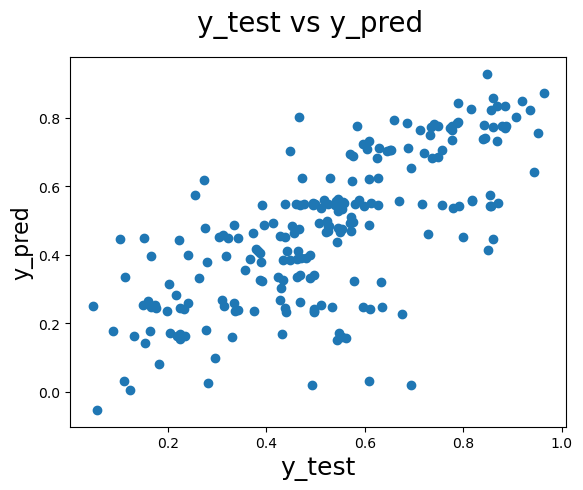

In [189]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [190]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)

print("R-squared:", r_squared)

R-squared: 0.3885856656580484
